<a href="https://colab.research.google.com/github/Ram04420/TensorFlow/blob/master/House_hold_Power_Consumption_Prediction_by_RNN_and_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import nan

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [40]:
data = pd.read_csv('/content/drive/My Drive/Datasets/household_power_consumption.txt', sep =';',
                   parse_dates = True,
                   low_memory = True)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [41]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [42]:
data['date_time'] = data['Date'].str.cat(data['Time'], sep = ' ')
data.drop(['Date', 'Time'], inplace= True, axis =1)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,16/12/2006 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,16/12/2006 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,16/12/2006 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,16/12/2006 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,16/12/2006 17:28:00


In [43]:
data.set_index(['date_time'], inplace= True)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
16/12/2006 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
16/12/2006 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
16/12/2006 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
16/12/2006 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
16/12/2006 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [0]:
data.replace('?', nan, inplace=True)

In [0]:
data = data.astype(float)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075259 entries, 16/12/2006 17:24:00 to 26/11/2010 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7+ MB


In [47]:
np.isnan(data).sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [0]:
def fill_missing(data):
  one_day = 24*60
  for row in range(data.shape[0]):
    for col in range(data.shape[1]):
      if np.isnan(data[row, col]):
        data[row, col] = data[row-one_day, col]

In [0]:
fill_missing(data.values)

In [50]:
np.isnan(data).sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075259 entries, 16/12/2006 17:24:00 to 26/11/2010 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7+ MB


In [52]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.089418e+00,1.236871e-01,2.408364e+02,4.618401e+00,1.118474e+00,1.291131e+00,6.448635e+00
std,1.054678e+00,1.125933e-01,3.240051e+00,4.433165e+00,6.141460e+00,5.796922e+00,8.433584e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410000e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.526000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [53]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
16/12/2006 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
16/12/2006 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
16/12/2006 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
16/12/2006 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
16/12/2006 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


**Prepare Power Consumption each day**

In [0]:
data.to_csv('cleaned_data.csv')

In [55]:
dataset = pd.read_csv('cleaned_data.csv', parse_dates = True, index_col= 'date_time', low_memory=False)
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [0]:
data = dataset.resample('D').sum()

In [57]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


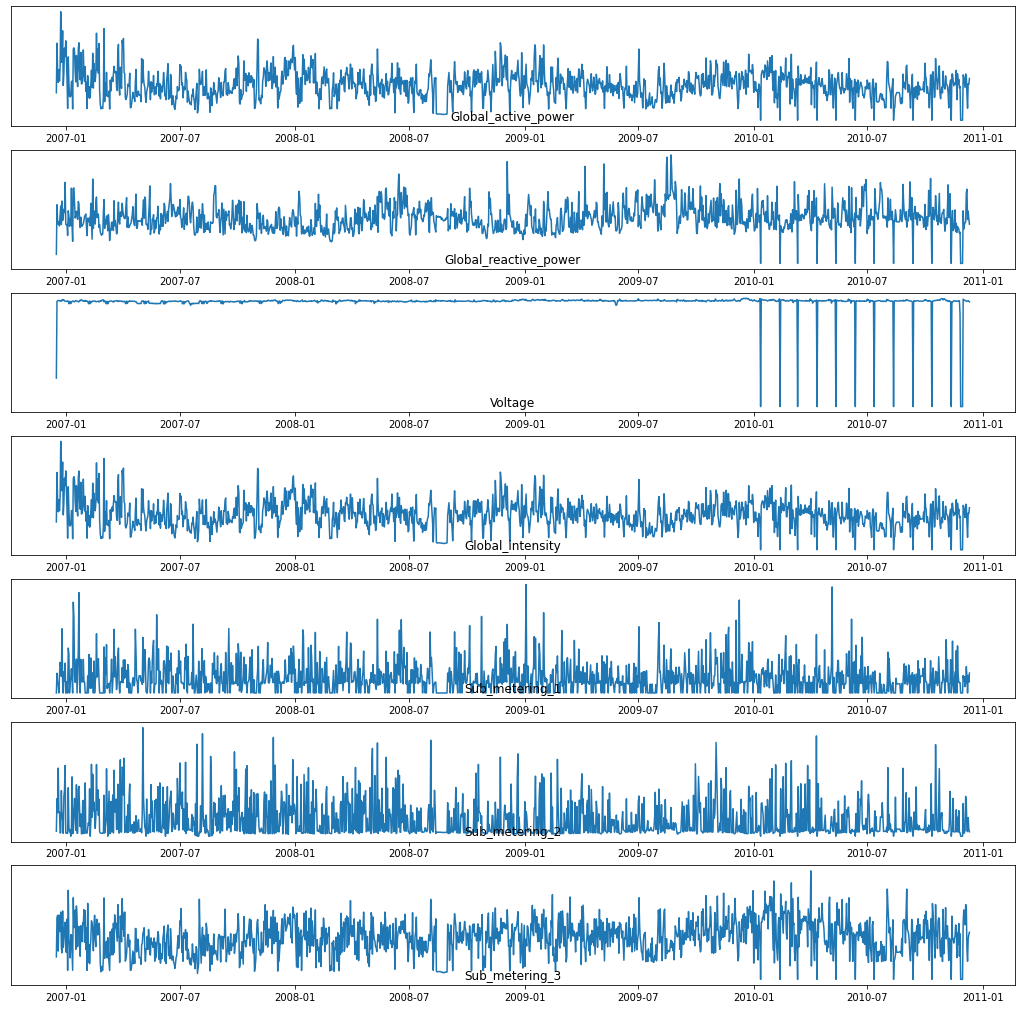

In [58]:
fig, ax = plt.subplots(figsize = (18,18))

for i in range(len(data.columns)):
  plt.subplot(len(data.columns), 1, i+1)
  name = data.columns[i]
  plt.plot(data[name])
  plt.title(name, y=0)
  plt.yticks([])
plt.show()
fig.tight_layout()

**Exploring Active Power consumption for each year**

In [0]:
years = ['2007', '2008', '2009', '2010']

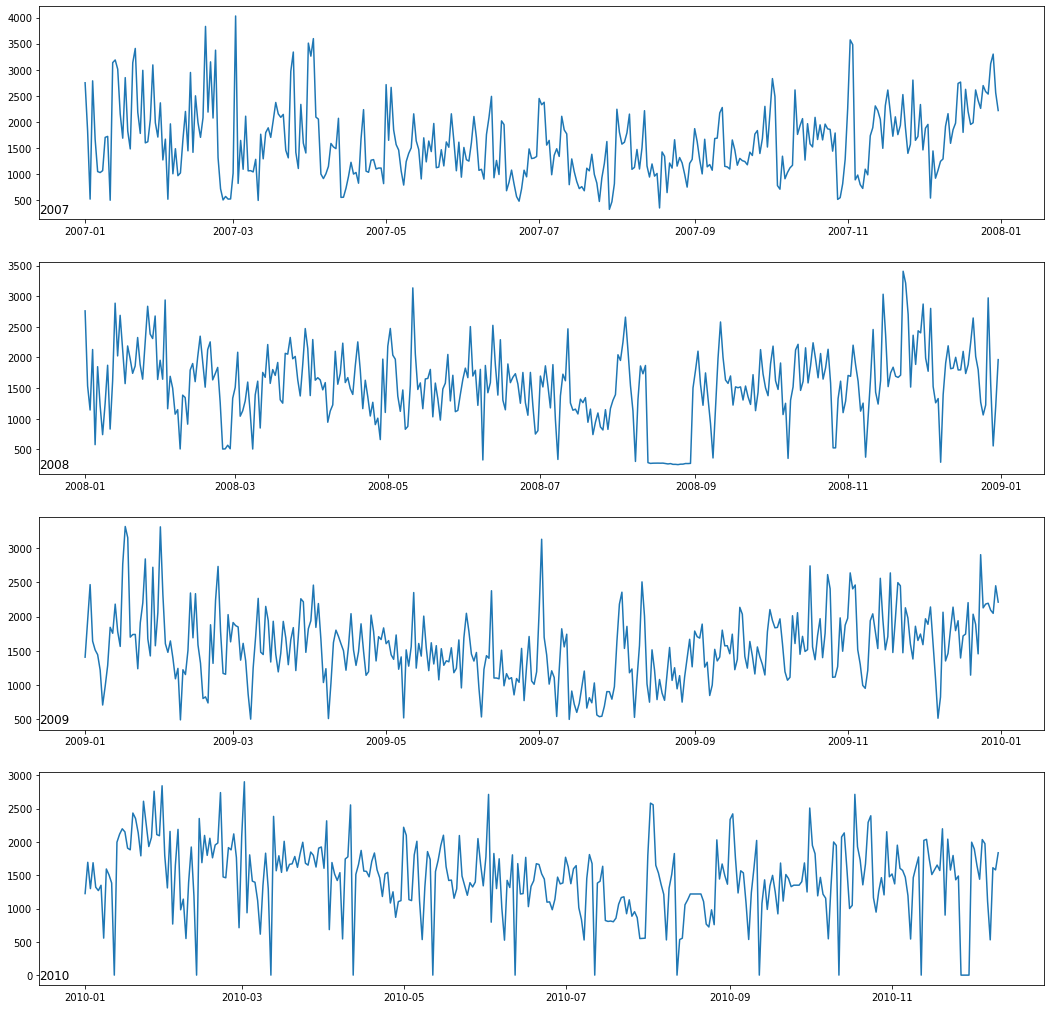

In [60]:
fig, ax = plt.subplots(figsize = (18,18))

for i in range(len(year)):
  ax = plt.subplot(len(years), 1, i+1)
  year = years[i]
  active_power_data = data[str(year)]
  plt.plot(active_power_data['Global_active_power'])
  plt.title(str(year), y = 0, loc = 'left')
plt.show()
fig.tight_layout()

In [61]:
data['2006']

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
2006-12-21,1723.288,144.434,347096.41,7266.4,1765.0,2692.0,10456.0
2006-12-22,2341.338,186.906,347305.75,9897.0,3151.0,350.0,11131.0
2006-12-23,4773.386,221.470,345795.95,20200.4,2669.0,425.0,14726.0
2006-12-24,2550.012,149.900,348029.91,11002.2,1703.0,5082.0,6891.0


**Power Consumption distribution with histogram**

In [0]:
#Active power 

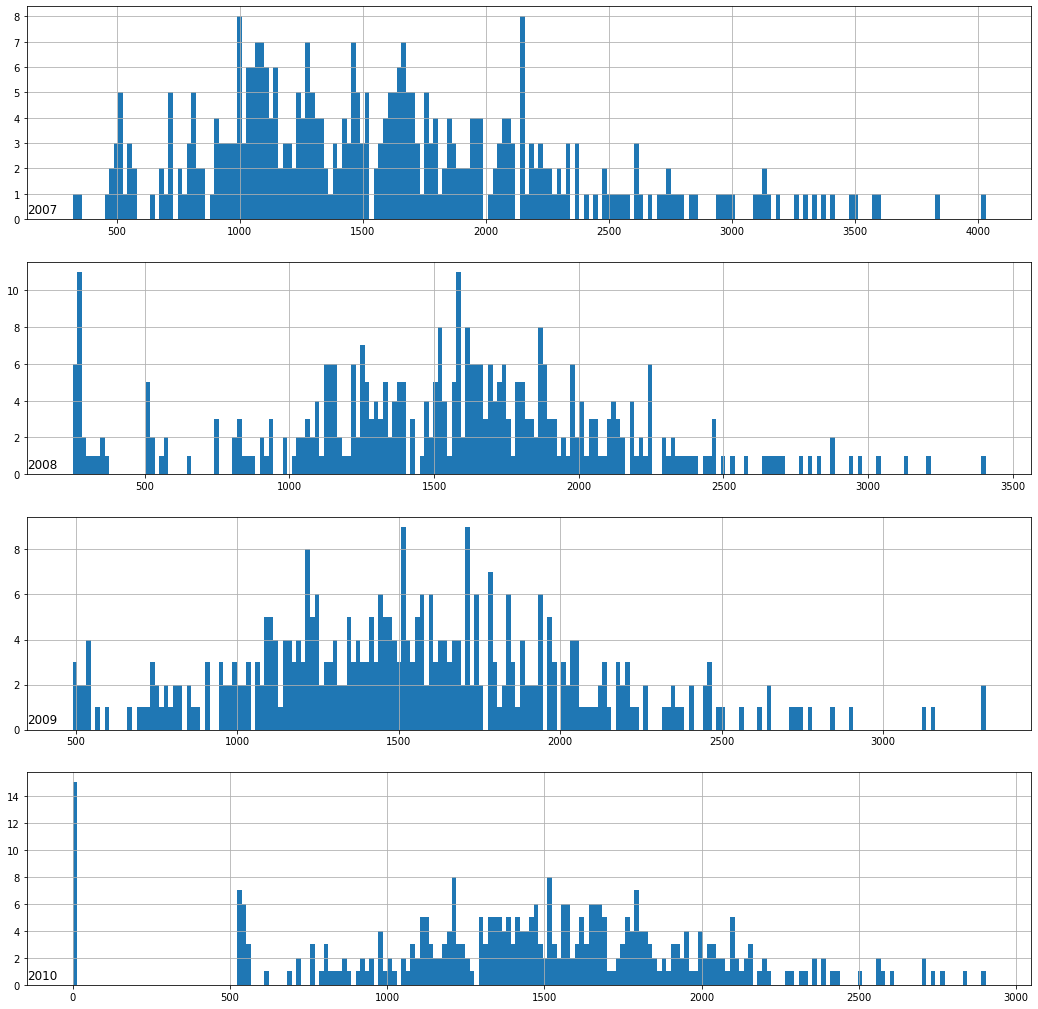

In [63]:
fig, ax = plt.subplots(figsize = (18,18))

for i in range(len(year)):
  plt.subplot(len(years), 1, i+1)
  year = years[i]
  active_power_data = data[str(year)]
  active_power_data['Global_active_power'].hist(bins = 200)
  plt.title(str(year), y = 0, loc = 'left')
plt.show()
fig.tight_layout()

In [0]:
#for full data

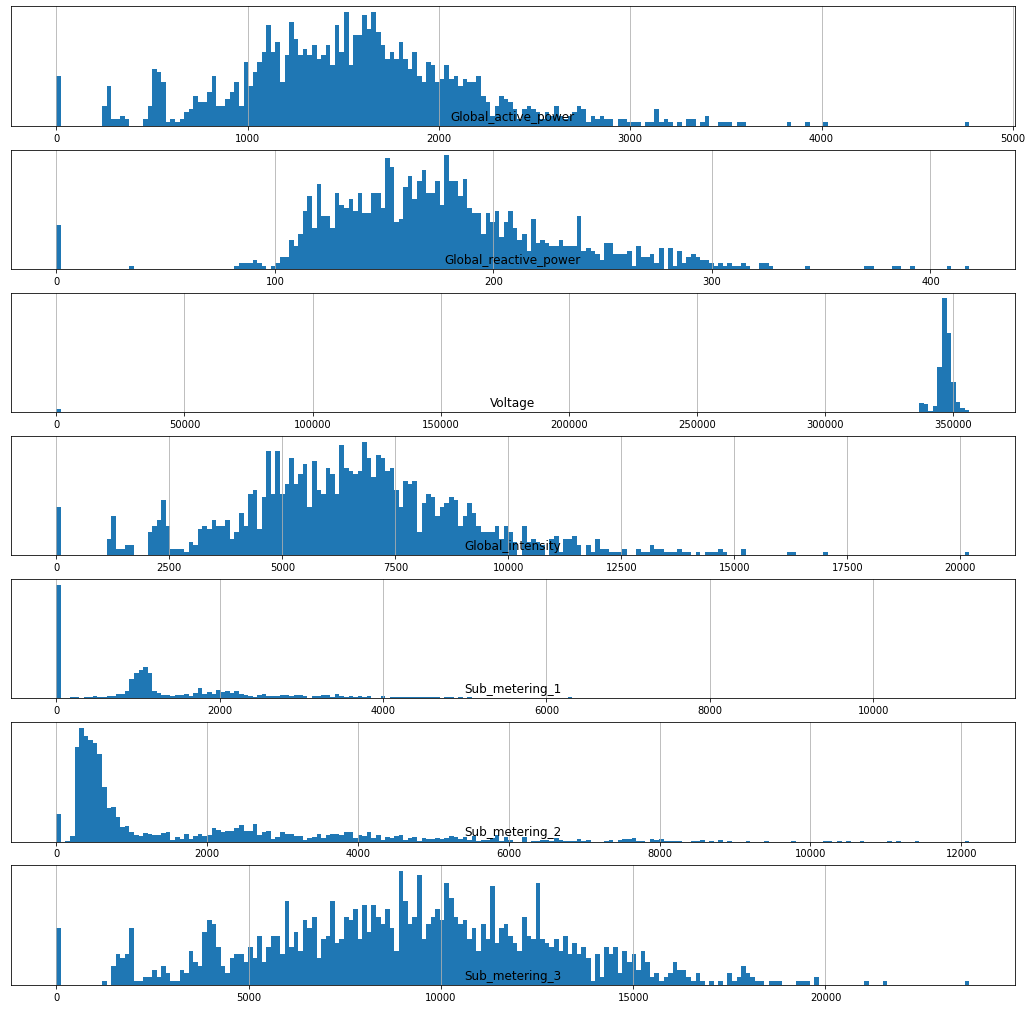

In [65]:
fig, ax = plt.subplots(figsize = (18,18))

for i in range(len(data.columns)):
  plt.subplot(len(data.columns), 1, i+1)
  name = data.columns[i]
  data[name].hist(bins = 200)
  plt.title(name, y=0)
  plt.yticks([])
plt.show()
fig.tight_layout()

**Plot Power Consumption hist for each month of 2007**

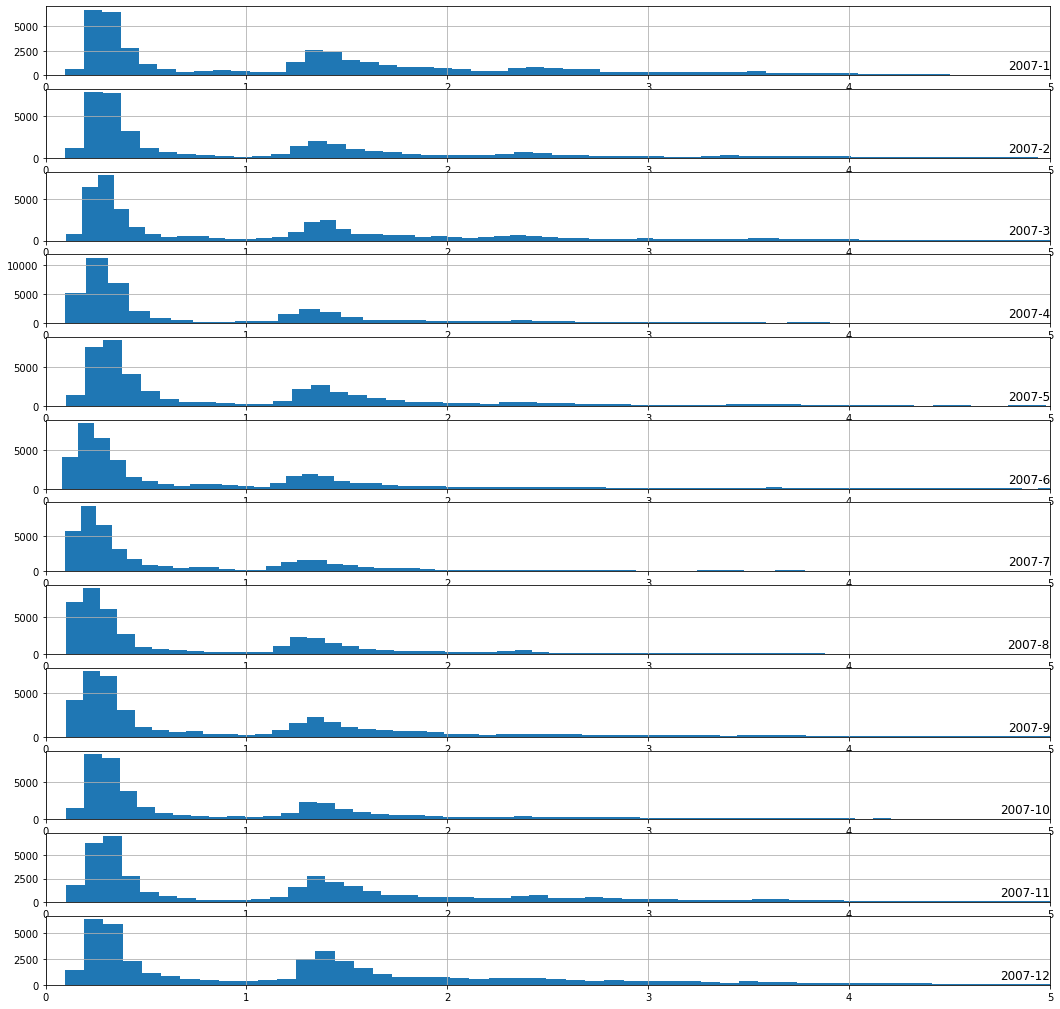

In [66]:
months = [i for i in range(1,13)]

fig, ax = plt.subplots(figsize = (18,18))

for i in range(len(months)):
  ax = plt.subplot(len(months), 1, i+1)
  month = '2007-' + str(months[i])
  active_power_data = dataset[month]
  active_power_data['Global_active_power'].hist(bins = 100)
  ax.set_xlim(0,5)
  plt.title(month, y =0, loc = 'right')
plt.show()
fig.tight_layout()


In [67]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [68]:
data.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2010-12-07,1109.574,285.912,345914.85,4892.0,1724.0,646.0,6444.0
2010-12-08,529.698,169.098,346744.70,2338.2,0.0,514.0,3982.0
2010-12-09,1612.092,201.358,347932.40,6848.2,1805.0,2080.0,8891.0
2010-12-10,1579.692,170.268,345975.37,6741.2,1104.0,780.0,9812.0
2010-12-11,1836.822,151.144,343926.57,7826.2,2054.0,489.0,10308.0


In [69]:
data_train = data.loc[:'2009-12-31', :]['Global_active_power']
data_train.head()

date_time
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
Freq: D, Name: Global_active_power, dtype: float64

In [70]:
data_test = data['2010']['Global_active_power']
data_test.head()

date_time
2010-01-01    1224.252
2010-01-02    1693.778
2010-01-03    1298.728
2010-01-04    1687.440
2010-01-05    1320.158
Freq: D, Name: Global_active_power, dtype: float64

In [72]:
data_train.shape, data_test.shape

((1112,), (345,))

**Prepare training Data**

In [73]:
data_train.head(14)

date_time
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
2006-12-21    1723.288
2006-12-22    2341.338
2006-12-23    4773.386
2006-12-24    2550.012
2006-12-25    2743.120
2006-12-26    3934.110
2006-12-27    1528.760
2006-12-28    2072.638
2006-12-29    3174.392
Freq: D, Name: Global_active_power, dtype: float64

In [0]:
data_train = np.array(data_train)

In [0]:
x_train, y_train = [],[]

for i in range(7, len(data_train)-7):
  x_train.append(data_train[i-7:i])
  y_train.append(data_train[i:i+7])

In [0]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [77]:
x_train.shape, y_train.shape

((1098, 7), (1098, 7))

In [78]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6
0,1209.176,3390.460,2203.826,1666.194,2225.748,1723.288,2341.338
1,3390.460,2203.826,1666.194,2225.748,1723.288,2341.338,4773.386
2,2203.826,1666.194,2225.748,1723.288,2341.338,4773.386,2550.012
3,1666.194,2225.748,1723.288,2341.338,4773.386,2550.012,2743.120
4,2225.748,1723.288,2341.338,4773.386,2550.012,2743.120,3934.110
...,...,...,...,...,...,...,...
1093,2138.814,1794.862,1940.116,1394.874,1717.182,1744.706,2204.334
1094,1794.862,1940.116,1394.874,1717.182,1744.706,2204.334,1144.166
1095,1940.116,1394.874,1717.182,1744.706,2204.334,1144.166,2034.966
1096,1394.874,1717.182,1744.706,2204.334,1144.166,2034.966,1888.022


In [0]:
x_scaler = MinMaxScaler()

In [0]:
x_train = x_scaler.fit_transform(x_train)


In [0]:
y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train)

In [83]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6
0,0.211996,0.694252,0.431901,0.313037,0.436748,0.325660,0.462304
1,0.694252,0.431901,0.313037,0.436748,0.325660,0.462304,1.000000
2,0.431901,0.313037,0.436748,0.325660,0.462304,1.000000,0.508439
3,0.313037,0.436748,0.325660,0.462304,1.000000,0.508439,0.551133
4,0.436748,0.325660,0.462304,1.000000,0.508439,0.551133,0.814446
...,...,...,...,...,...,...,...
1093,0.417528,0.341484,0.373598,0.253052,0.324310,0.330396,0.432014
1094,0.341484,0.373598,0.253052,0.324310,0.330396,0.432014,0.197623
1095,0.373598,0.253052,0.324310,0.330396,0.432014,0.197623,0.394568
1096,0.253052,0.324310,0.330396,0.432014,0.197623,0.394568,0.362081


In [85]:
x_train = x_train.reshape(1098, 7, 1)
x_train.shape

(1098, 7, 1)

**Build LSTM**

In [0]:
reg = Sequential()
reg.add(LSTM(units=200, activation='relu', input_shape = (7,1)))
reg.add(Dense(7))

In [0]:
reg.compile(loss = 'mse', optimizer='adam', )

In [88]:
reg.fit(x_train, y_train, epochs = 100)

Epoch 1/100
35/35 [==============================] - 1s 18ms/step - loss: 0.0592
Epoch 2/100
35/35 [==============================] - 1s 17ms/step - loss: 0.0244
Epoch 3/100
35/35 [==============================] - 1s 17ms/step - loss: 0.0241
Epoch 4/100
35/35 [==============================] - 1s 18ms/step - loss: 0.0241
Epoch 5/100
35/35 [==============================] - 1s 17ms/step - loss: 0.0240
Epoch 6/100
35/35 [==============================] - 1s 17ms/step - loss: 0.0241
Epoch 7/100
35/35 [==============================] - 1s 17ms/step - loss: 0.0239
Epoch 8/100
35/35 [==============================] - 1s 17ms/step - loss: 0.0239
Epoch 9/100
35/35 [==============================] - 1s 17ms/step - loss: 0.0238
Epoch 10/100
35/35 [==============================] - 1s 17ms/step - loss: 0.0239
Epoch 11/100
35/35 [==============================] - 1s 17ms/step - loss: 0.0238
Epoch 12/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0239
Epoch 13/100
35/35 [=====

**Prepare Testing Dataset for testing LSTM Model**

In [0]:
data_test = np.array(data_test)

In [0]:
x_test, y_test = [],[]

for i in range(7, len(data_test)-7):
  x_test.append(data_test[i-7:i])
  y_test.append(data_test[i:i+7])

In [0]:
x_test, y_test =  np.array(x_test), np.array(y_test)

In [0]:
x_test = x_scaler.transform(x_test)
y_test = y_scaler.transform(y_test)

In [95]:
x_test.shape

(331, 7)

In [96]:
x_test = x_test.reshape(331,7,1)
x_test.shape

(331, 7, 1)

In [0]:
y_pred = reg.predict(x_test)

In [98]:
y_pred

array([[0.2767591 , 0.33084047, 0.3363679 , ..., 0.3577795 , 0.34831154,
        0.32187015],
       [0.20112208, 0.2822277 , 0.29594815, ..., 0.34637797, 0.34028983,
        0.30725688],
       [0.28116912, 0.33570474, 0.3385949 , ..., 0.34859127, 0.33258048,
        0.31090295],
       ...,
       [0.18166968, 0.22501564, 0.24135502, ..., 0.1703043 , 0.11538686,
        0.13680759],
       [0.29229307, 0.33705193, 0.3065396 , ..., 0.22774623, 0.18016352,
        0.19799899],
       [0.29748893, 0.33823976, 0.29580462, ..., 0.25134796, 0.22412969,
        0.23660606]], dtype=float32)

In [0]:
y_pred = y_scaler.inverse_transform(y_pred)

In [100]:
y_pred

array([[1502.1036 , 1500.6843 , 1521.575  , ..., 1602.4984 , 1566.715  ,
        1466.7817 ],
       [1159.9908 , 1316.956  , 1368.8115 , ..., 1559.4071 , 1536.3975 ,
        1411.552  ],
       [1522.0507 , 1519.0685 , 1529.9917 , ..., 1567.7722 , 1507.2606 ,
        1425.332  ],
       ...,
       [1072.006  , 1100.7274 , 1162.481  , ...,  893.9502 ,  686.39386,
         767.3519 ],
       [1572.3652 , 1524.1602 , 1408.8411 , ..., 1111.0476 ,  931.21234,
         998.6201 ],
       [1595.8666 , 1528.6494 , 1368.269  , ..., 1200.2484 , 1097.3792 ,
        1144.5326 ]], dtype=float32)

In [0]:
y_true = y_scaler.inverse_transform(y_test)

In [104]:
y_true

array([[2.51356747e+06, 6.02207459e+06, 5.68760312e+06, ...,
        2.50298000e+02, 7.54320960e+06, 7.99835807e+06],
       [7.20696782e+06, 5.68760312e+06, 5.22787399e+06, ...,
        7.54320960e+06, 7.99835807e+06, 8.30273776e+06],
       [6.80668358e+06, 5.22787399e+06, 2.50298000e+02, ...,
        7.99835807e+06, 8.30273776e+06, 8.12643519e+06],
       ...,
       [8.56244684e+06, 6.21900525e+06, 5.44045147e+06, ...,
        7.45849759e+06, 4.19380090e+06, 2.00220363e+06],
       [7.44264785e+06, 5.44045147e+06, 7.69295794e+06, ...,
        4.19380090e+06, 2.00220363e+06, 6.09302949e+06],
       [6.51090077e+06, 7.69295794e+06, 7.45849759e+06, ...,
        2.00220363e+06, 6.09302949e+06, 5.97057616e+06]])

**Evalute the Model**

In [0]:
def evaluate_model(y_true, y_predicated):
  scores = []

  #calculate scores for each day

  for i in range (y_true.shape[1]):
    mse = mean_squared_error(y_true[:,i], y_predicated[:, i])
    rmse = np.sqrt(mse)
    scores.append(rmse)

    #calculate score for whole predications
    total_score = 0
    for row in range (y_true.shape[0]):
      for col in range(y_predicated.shape[1]):
        total_score = total_score + (y_true[row, col]- y_predicated[row, col])**2
    total_score = np.sqrt(total_score/(y_true.shape[0]*y_predicated.shape[1]))
    return total_score, scores

In [106]:
evaluate_model(y_true, y_pred)

(6103358.062275207, [7074512.562990076])

In [108]:
np.std(y_true[0])

2624262.180902731